In [8]:
import numpy as np
import matplotlib.pyplot as plt
from random import random

F=[[13,5,6],
   [6,12,4],
   [1,3,10]]
P=[0.885,0.115,0]
#1 критерий
B=[0,0,0]
print('Критерий 1:')
for i in range (3):
    B[i]=F[0][i]*P[0]+F[1][i]*P[1]+F[2][i]*P[2]
    print('B',i+1,'=',B[i])
print('Оптимальное решение:1')

#2 критерий
print('\nКритерий 2:')
lam1=np.amin(F)
lam2=np.amax(F)
Pm =[]
print('min=',lam1,'max=',lam2)
print("%2s%5s%5s%5s" %('i','p_1','p_2','p_3'))
for i in range(lam1+1, lam2):
    k1=0
    k2=0
    k3=0
    for j in range(3):
        if F[j][0] >= i:
            k1+=1
        if F[j][1] >= i:
            k2+=1
        if F[j][2] >= i:
            k3+=1    
    print("%2s%5s%5s%5s" %(i,"%.1f" %(k1/3),"%.1f" % (k2/3),"%.1f" % (k3/3)))
print('Оптимальное решение:2 и 3 равноценны')

#3 критерий
print('\nКритерий 3:')
sig=[0,0,0]
for j in range(3):
    summ=0
    for i in range(3):
        summ+=(F[i][j] - B[j])**2
    sig[j]= summ*P[j]
    print('sig',j+1,'=',sig[j])
print('Оптимальное решение:3')

#4 критерий
print('\nКритерий 4:')
print('max P=',np.max(P))
print('agrmax f=',np.max(F[0]))
print('Оптимальное решение:1')

#5 критерий
print('\nКритерий 5:')
summ=0
for j in range (3):
    for i in range (3):
        summ+=(P[i]*F[i][j])/B[i] * np.log((P[i]*F[i][j])/B[i])
    print('H',j+1,'=',"%.3f" %(-summ))
print('Оптимальное решение:1')

#6 критерий
print('\nКритерий 6:')
lam=0.5
for i in range (3):
    M=(1-lam)*(B[i])**2-lam*sig[i]
    print('M',i+1,'=',"%.3f" %(M))
print('Оптимальное решение:3')

Критерий 1:
B 1 = 12.195
B 2 = 5.805
B 3 = 5.7700000000000005
Оптимальное решение:1

Критерий 2:
min= 1 max= 13
 i  p_1  p_2  p_3
 2  0.7  1.0  1.0
 3  0.7  1.0  1.0
 4  0.7  0.7  1.0
 5  0.7  0.7  0.7
 6  0.7  0.3  0.7
 7  0.3  0.3  0.3
 8  0.3  0.3  0.3
 9  0.3  0.3  0.3
10  0.3  0.3  0.3
11  0.3  0.3  0.0
12  0.3  0.3  0.0
Оптимальное решение:2 и 3 равноценны

Критерий 3:
sig 1 = 145.45335637500003
sig 2 = 5.392818624999999
sig 3 = 0.0
Оптимальное решение:3

Критерий 4:
max P= 0.885
agrmax f= 13
Оптимальное решение:1

Критерий 5:
H 1 = nan
H 2 = nan
H 3 = nan
Оптимальное решение:1

Критерий 6:
M 1 = 1.632
M 2 = 14.153
M 3 = 16.646
Оптимальное решение:3


<ipython-input-8-fc2344e6dd74>:60: RuntimeWarning: divide by zero encountered in log
  summ+=(P[i]*F[i][j])/B[i] * np.log((P[i]*F[i][j])/B[i])
<ipython-input-8-fc2344e6dd74>:60: RuntimeWarning: invalid value encountered in double_scalars
  summ+=(P[i]*F[i][j])/B[i] * np.log((P[i]*F[i][j])/B[i])


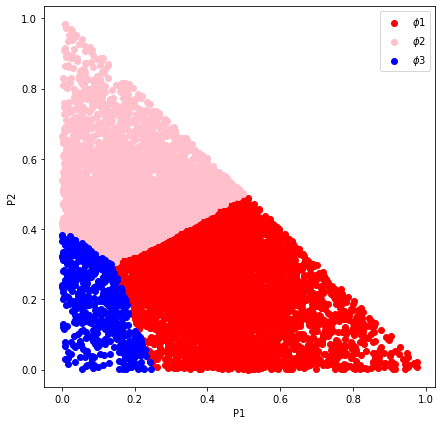

In [9]:
S1=[]
S2=[]
S3=[]
S=[S1,S2,S3]
n=10000

for i in range (n):
    Pm=[]
    for j in range(3):
        Pm.append(random())
    Pm=np.array(Pm)
    Pm=Pm/sum(Pm)
    
    multi = list(np.dot(F,Pm))
    max_ = max(multi)
    ind=multi.index(max_)
    S[ind].append([Pm[0],Pm[1],Pm[2]])

def Get(S):
    n = len(S)
    X=[]
    Y=[]
    Z=[]
    for i in range(n):
        X.append(S[i][0])
        Y.append(S[i][1])
        Z.append(S[i][2])
    return X,Y,Z
fig, ax = plt.subplots(figsize = (7, 7))

X, Y, Z = Get(S[0])
plt.scatter(X, Y, label = r'$\phi1$' , color = 'red')

X, Y, Z = Get(S[1])
plt.scatter(X, Y, label = r'$\phi2$', color = 'pink')

X, Y, Z = Get(S[2])
plt.scatter(X, Y, label = r'$\phi3$', color = 'blue')
plt.xlabel("P1")
plt.ylabel("P2")
plt.legend()


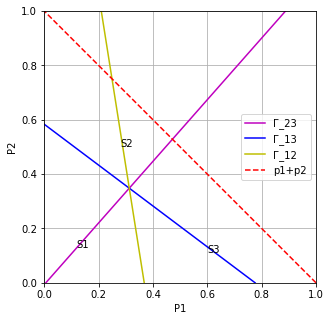

In [37]:
#Байесовы множества для I_1 и I_2
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,50)

def f1(x):
    return 0.882 * x + 0.006
def f2(x):
    return -1.33 * x + 0.776
def f3(x):
    return -0.158 * x + 0.368
def f4(x):
    return 1 - x
def f5(x):
    return 0


y1 = np.vectorize(f1)
y2 = np.vectorize(f2)
y3 = np.vectorize(f3)

y4 = np.vectorize(f4)
y5 = np.vectorize(f5)

d = np.linspace(0,1,500)
x1,x2 = np.meshgrid(d,d)

fig, ax = plt.subplots(figsize=(8,5))  
ax.imshow( ((1>=x1+x2) & (x1<=-0.158*x2+0.368) & (x1<=-1.33 * x2 + 0.776)).astype(float) , 
                extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.0);
ax.imshow( ((1>=x1+x2) & (x1>=0.882 * x2 + 0.006) & (x1>=-1.33 * x2 + 0.776)).astype(float) , 
                extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.0);
ax.imshow( ((1>=x1+x2) & (x1>=-0.158*x2+0.368) & (x1<=0.882 * x2 + 0.006)).astype(float) , 
                extent=(x1.min(),x1.max(),x2.min(),x2.max()),origin="lower", cmap="Greys", alpha = 0.0);


ax.grid(True)
plt.xlim([0,1])
plt.ylim([0,1])
plt.text(0.6, 0.11, 'S3')
plt.text(0.28, 0.5, 'S2')
plt.text(0.12, 0.13, 'S1')
ax.plot(y1(x),x,'m',label='Г_23')
ax.plot(y2(x),x,'b', label ='Г_13')
ax.plot(y3(x),x,'y', label ='Г_12')
ax.plot(y4(x),x,'r--',label ='p1+p2')
ax.set_xlabel('P1')  
ax.set_ylabel('P2')  
ax.legend() 